In [6]:
import pandas as pd
import pylab as pl
import numpy as np
import re
from sklearn.model_selection import train_test_split, KFold

# Read CSV file into Python

In [7]:
#covert a string that is camelcase into snake_case
def camel_to_snake(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [8]:
df = pd.read_csv('./credit-data.csv')

In [9]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
# convert each column name to snake case
df.columns = [camel_to_snake(col) for col in df.columns]

# Data exploration

In [11]:
df.count()

person_id                                      150000
serious_dlqin2yrs                              150000
revolving_utilization_of_unsecured_lines       150000
age                                            150000
zipcode                                        150000
number_of_time30-59_days_past_due_not_worse    150000
debt_ratio                                     150000
monthly_income                                 120269
number_of_open_credit_lines_and_loans          150000
number_of_times90_days_late                    150000
number_real_estate_loans_or_lines              150000
number_of_time60-89_days_past_due_not_worse    150000
number_of_dependents                           146076
dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

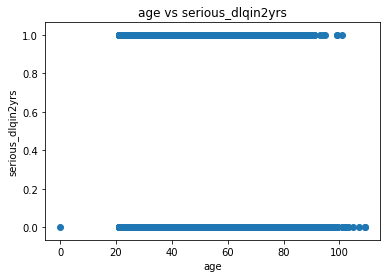

In [13]:
plt.scatter(df['age'], df['serious_dlqin2yrs'])
plt.title('age vs serious_dlqin2yrs')
plt.xlabel('age') 
plt.ylabel('serious_dlqin2yrs')
plt.show()

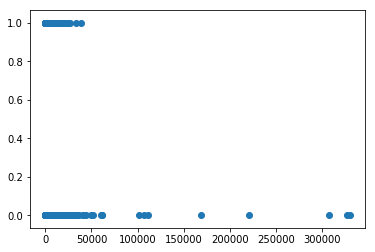

In [14]:
plt.scatter(df['debt_ratio'], df['serious_dlqin2yrs'])
plt.show()

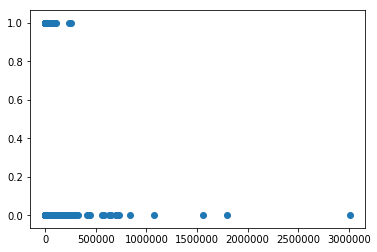

In [15]:
plt.scatter(df['monthly_income'], df['serious_dlqin2yrs'])
plt.show()

we can find that the output seriousdlqin2yrs only takes on value 1 or 0 for every variable.

# Data Cleaning and fill out missing data

In [16]:
#figure out which variables contain null values. First, melt our data into long format.print a table telling the no of null and non-null instances.
df_lng = pd.melt(df)

In [17]:
#create a pivot table
df_lng.head()

,variable,value
0,person_id,1.0
1,person_id,2.0
2,person_id,3.0
3,person_id,4.0
4,person_id,5.0


In [18]:
null_variables = df_lng.value.isnull()

In [19]:
pd.crosstab(df_lng.variable, null_variables)

value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,120269,29731
number_of_dependents,146076,3924
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


In [20]:
#abstract code into function 
def print_null_freq(df):
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
pd.crosstab(df_lng.variable, null_variables)

value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,120269,29731
number_of_dependents,146076,3924
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


We can see that monthly income and numbers of dependents have missing values.Next is to replace the missing values.

In [21]:
#Number of dependents
df.number_of_dependents = df.number_of_dependents.fillna(0)
print_null_freq(df)

In [22]:
df.monthly_income.describe()
replacement_value = df.monthly_income.median()
replacement_value = df.monthly_income.mean()

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
income_imputer = KNeighborsRegressor(n_neighbors=1)
nonnull_data= df[df.monthly_income.isnull()==False]
null_data = df[df.monthly_income.isnull()==True]
X = nonnull_data[['debt_ratio', 'age']]
y = nonnull_data.monthly_income
income_imputer.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [25]:
#remove missing values from null_data
new_values = income_imputer.predict(null_data[['debt_ratio', 'age']])
null_data.monthly_income = new_values

/Users/Xinyuan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
#reconstruct df
df = nonnull_data.append(null_data)

In [27]:
print_null_freq(df)

As we can see, there is no missing values.

# Features generation and building the classifer

In [39]:
#Apply linear regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
#model evaluation
from sklearn.metrics import mean_squared_error

Split the data

In [40]:
from sklearn.model_selection import train_test_split
features = ['revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse',
            'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 'number_of_times90_days_late',
            'number_real_estate_loans_or_lines','number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'] 
df_features = df[features]
df_target = df['serious_dlqin2yrs']
x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)

In [41]:
import numpy as np
N = 1000
x = np.random.random((N, 10))
y = np.random.random(N)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
alphas = [10**i for i in range(-3, 3)]
splits = 5
kf = KFold(n_splits=splits)

In [42]:
from sklearn.linear_model import Ridge
results = {}
for fold_num, (train_idx, test_idx) in enumerate(kf.split(x_train)):
    x_split_train, x_split_test = x_train[train_idx], x_train[test_idx]
    y_split_train, y_split_test = y_train[train_idx], y_train[test_idx]
    
    for a in alphas:
        linreg = Ridge(alpha=a)
        linreg.fit(x_split_train, y_split_train)
        y_pred = linreg.predict(x_split_test)
        model_key = (a, ) 
        results[a] =  results.get(a, 0) + mean_squared_error(y_pred, y_split_test) / splits

In [38]:
for model, model_perf in results.items():
    print("Model with params: {} | MSE: {:.2f}".format(model, model_perf))

Model with params: 0.001 | MSE: 0.09
Model with params: 0.01 | MSE: 0.09
Model with params: 0.1 | MSE: 0.09
Model with params: 1 | MSE: 0.09
Model with params: 10 | MSE: 0.08
Model with params: 100 | MSE: 0.08


In [43]:
c_values = []

In [44]:
def cv_logistic_regression(**params):
    kf = KFold(n_splits=5)
    pass

Building the model

In [45]:
def logistic_log_likelihood_i(x_i, y_i, beta): 
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta))) 
    else:
        return math.log(1 - logistic(dot(x_i, beta)))

In [46]:
def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
               for x_i, y_i in zip(x, y))

In [47]:
def logistic_log_partial_ij(x_i, y_i, beta, j): 
    return (y_i - logistic(dot(x_i, beta))) * x_i[j] 
def logistic_log_gradient_i(x_i, y_i, beta):
    return [logistic_log_partial_ij(x_i, y_i, beta, j) 
            for j, _ in enumerate(beta)]

In [48]:
def logistic_log_gradient(x, y, beta): 
    return reduce(vector_add,
                  [logistic_log_gradient_i(x_i, y_i, beta) 
                  for x_i, y_i in zip(x,y)])

In [ ]:
from sklearn.linear_model import LogisticRegression
random.seed(0)
#maximize log likelihood on the training data
fn = partial(logistic_log_likelihood, x_train, y_train)
gradient_fn = partial(logistic_log_gradient, x_train, y_train)

In [ ]:
#pick a random starting point
beta_0 = [random.random() for _ in range(3)]

# maximize using gradient descent
beta_hat = maximize_batch(fn, gradient_fn, beta_0)

# Evaluation classifer

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df_features, df_target))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets